# Calculating values on total energy increase with each percentage of EV adoption reported in the text.

Developed by Siobhan Powell, 2021. 

In [1]:
import os
os.chdir('../')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.gridspec import GridSpec
import pickle
import datetime

In [7]:
noev_scenario = pd.read_csv('Results/NoEVs_year2035_solar3.5x_wind3x_withstorage_dpdf_20220408.csv')

In [17]:
vals_shift = noev_scenario['total_incl_noncombustion'].sum()

In [20]:
scens1 = ['_TimersRandom_noWPcontrol', '_Timers9pm_noWPcontrol', '_Timers12am_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem']
scens2 = ['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork']

vals = np.zeros((10, 7, 5)) # peak mean weekday total demand
tables_dfs = {penlevel: pd.DataFrame(np.zeros((7, 5)), 
                                     index=['_TimersRandom_noWPcontrol', '_Timers9pm_noWPcontrol', '_Timers12am_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem', '_TimersMixed_WPcontrol_minpeak'], 
                                     columns=['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork', 'BusinessAsUsual']) for penlevel in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}

for k, penlevel in enumerate([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]):
    if penlevel == 0.5:
        folder = 'Fuel1_Solar35_Wind3'
    else:
        folder = 'Fuel1_Solar35_Wind3_Curves'
    for i, scen1 in enumerate(scens1):
        for j, scen2 in enumerate(scens2):
            demand_df = pd.read_csv('Results/'+folder+'/fuel1_solar3.5_wind3_'+scen2+scen1+'_penlevel'+str(penlevel)+'_withstorage_dpdf_20220408.csv')
            vals[k, i, j] = demand_df['total_incl_noncombustion'].sum()
            tables_dfs[penlevel].loc[scen1, scen2] = demand_df['total_incl_noncombustion'].sum()
        
    scen2 = 'BusinessAsUsual'
    scen1 =  '_TimersMixed_WPcontrol_minpeak'
    i = i+1
    j = j+1
    demand_df = pd.read_csv('Results/'+folder+'/fuel1_solar3.5_wind3_'+scen2+scen1+'_penlevel'+str(penlevel)+'_withstorage_dpdf_20220408.csv')
    vals[k, i, j] = demand_df['total_incl_noncombustion'].sum()
    tables_dfs[penlevel].loc[scen1, scen2] = demand_df['total_incl_noncombustion'].sum()


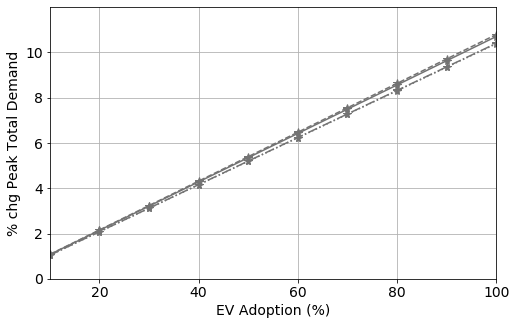

In [23]:
plt.figure(figsize=(8, 5))
colors = ['#d7301f', '#fc8d59', '#91cf60', '#737373', '#9ebcda', '#88419d']
lines = ['--', '-', ':', '-.']

markers=['P', 'X', 'd', '*', '^', 'v']
ms = [8,8,12,8,8]

idx_control = 3#2
for idx_access in range(4):
    plt.plot(np.arange(10, 105, 10), 100*((vals[:, idx_control, idx_access]-vals_shift)/vals_shift), lines[idx_access], color=colors[idx_control], marker=markers[idx_control],  markersize=ms[idx_control])
plt.xticks(np.arange(20, 125, 20), fontsize=14)
plt.xlabel('EV Adoption (%)', fontsize=14)
plt.yticks(np.arange(0, 12, 2), fontsize=14)
plt.ylabel('% chg Peak Total Demand', fontsize=14)
plt.xlim([10, 100])
plt.ylim([0, 12])
# axes[0].set_axisbelow(True)        
plt.grid()
plt.show()

In [39]:
ct = 0
val = 0
for control_idx in range(6):
    for scen_idx in range(4):
        val += vals[9, control_idx, scen_idx]
        ct += 1
val += vals[9, 6, 4]
ct += 1
mean_val = val / ct
print('Mean increase in energy over no evs, at 100% adoption: ', np.round((mean_val - vals_shift) / vals_shift, 5))

Mean increase in energy over no evs, at 100% adoption:  0.10618


In [40]:
ct = 0
val = 0
for control_idx in range(6):
    for scen_idx in range(4):
        val += vals[4, control_idx, scen_idx]
        ct += 1
val += vals[4, 6, 4]
ct += 1
mean_val = val / ct
print('Mean increase in energy over no evs, at 50% adoption: ', np.round((mean_val - vals_shift) / vals_shift, 5))

Mean increase in energy over no evs, at 50% adoption:  0.05309


In [41]:
ct = 0
val = 0
for control_idx in range(6):
    for scen_idx in range(4):
        val += ((vals[9, control_idx, scen_idx] - vals_shift) - (vals[0, control_idx, scen_idx]  - vals_shift))
        ct += 1
val += ((vals[9, 6, 4] - vals_shift) - (vals[0, 6, 4]  - vals_shift))
ct += 1
mean_val = val / ct
print('Mean change per degree: ', np.round(mean_val / (vals_shift*90), 5))

Mean change per degree:  0.00106


In [43]:
noev_scenario_2019 = pd.read_csv('Results/NoEVs_year2019_dpdf_20220330.csv')

In [44]:
ct = 0
val = 0
for control_idx in range(6):
    for scen_idx in range(4):
        val += vals[9, control_idx, scen_idx]
        ct += 1
val += vals[9, 6, 4]
ct += 1
mean_val = val / ct

vals_shift_2019 = noev_scenario_2019.total_incl_noncombustion.sum()

print('Mean increase in energy over no evs, with 100%: ', np.round((mean_val - vals_shift_2019) / vals_shift_2019, 5))

Mean increase in energy over no evs:  0.28317


In [45]:
ct = 0
val = 0
for control_idx in range(6):
    for scen_idx in range(4):
        val += vals[4, control_idx, scen_idx]
        ct += 1
val += vals[4, 6, 4]
ct += 1
mean_val = val / ct

vals_shift_2019 = noev_scenario_2019.total_incl_noncombustion.sum()

print('Mean increase in energy over no evs, with 50%: ', np.round((mean_val - vals_shift_2019) / vals_shift_2019, 5))

Mean increase in energy over no evs, with 50%:  0.22159
